In [1]:
import praw
import snscrape
import requests
import requests.auth
from tqdm import tqdm

In [2]:
import credentials as cd
import pandas as pd

In [3]:
reddit = praw.Reddit(
    client_id = cd.client_id,
    client_secret = cd.client_secret,
    user_agent = cd.user_agent,
    user_name = cd.user_name,
    password = cd.password,
    requested_scopes=["read", "search"]
)

In [4]:
def fetch_posts(subreddit_name, search_term, limit = 100):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    try:
        for post in tqdm(subreddit.search(search_term, limit = limit, time_filter = "month"), desc = "Fetching posts"):
            post_data = {
                'title' : post.title,
                'text' : post.selftext,
                'score' : post.score,
                'upvote_ratio' : post.upvote_ratio,
                "created_utc": post.created_utc,
                "author": str(post.author),
                "url": post.url,
            }
            posts.append(post_data)
    except Exception as e:
        print(f"Error fetching posts: {e}")
    
    return pd.DataFrame(posts)

df = fetch_posts("Cryptocurrency", "BTC", limit=500)
df.to_csv("reddit_posts.csv", index=False)
print(f"Collected {len(df)} posts.")

Fetching posts: 168it [00:02, 79.21it/s]

Collected 168 posts.


In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sainivasrangaraju/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df["sentiment"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])

df["sentiment_label"] = df["sentiment"].apply(
    lambda x: "positive" if x > 0.05 else "negative" if x < -0.05 else "neutral"
)

print(df[["text", "sentiment", "sentiment_label"]].head())

                                                text  sentiment  \
0                                                           0.0   
1                                                           0.0   
2                                                           0.0   
3                                                           0.0   
4  Source: [https://x.com/corybates1895/status/19...        0.0   

  sentiment_label  
0         neutral  
1         neutral  
2         neutral  
3         neutral  
4         neutral  


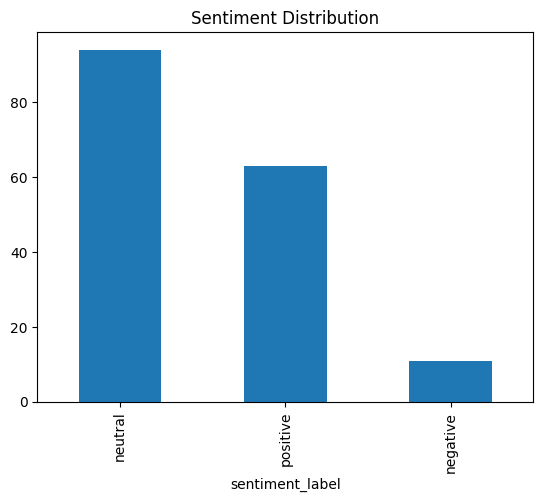

In [7]:
import matplotlib.pyplot as plt

df["sentiment_label"].value_counts().plot(kind="bar", title="Sentiment Distribution")
plt.show()